In [1]:
!pip install medmnist

  Obtaining dependency information for medmnist from https://files.pythonhosted.org/packages/8e/4b/83a368105698e77a7a972190973a5437a9a51789828562e1913687be9515/medmnist-3.0.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/96/23/18b9c16c18a77755e7f15173821c7100f11e6b3b7717bea8d729bdeb92c0/torch-2.2.2-cp311-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/36/15/c48f74f8f8d382677ef016b65f09969028a1549b8a518c18894deb95b544/torchvision-0.17.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for termcolor from https://files.pythonhosted.org/packages/d9/5f/8c716e47b3a50cbd7c146f45881e11d9414def768b7cd9c5e6650ec2a80a/termcolor-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency informa

In [2]:
from tqdm import tqdm
import numpy as np

import medmnist
from medmnist import INFO, Evaluator

In [3]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/


In [4]:
import dataset_without_pytorch

from dataset_without_pytorch import get_loader

# We first work on a 2D dataset with size 28x28

In [154]:
data_flag = 'chestmnist'
# data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 78468
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(dataset_without_pytorch, info['python_class'])

## First, we read the MedMNIST data, preprocess them and encapsulate them into dataloader form.

In [155]:
# load the data
chest_train_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = get_loader(dataset=chest_train_dataset, batch_size=BATCH_SIZE)

Using downloaded and verified file: /Users/ricardoangelperez/.medmnist/chestmnist.npz


In [156]:
print(chest_train_dataset)

Dataset ChestMNIST (chestmnist)
    Number of datapoints: 78468
    Root location: /Users/ricardoangelperez/.medmnist
    Split: train
    Task: multi-label, binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'atelectasis', '1': 'cardiomegaly', '2': 'effusion', '3': 'infiltration', '4': 'mass', '5': 'nodule', '6': 'pneumonia', '7': 'pneumothorax', '8': 'consolidation', '9': 'edema', '10': 'emphysema', '11': 'fibrosis', '12': 'pleural', '13': 'hernia'}
    Number of samples: {'train': 78468, 'val': 11219, 'test': 22433}
    Description: The ChestMNIST is based on the NIH-ChestXray14 dataset, a dataset comprising 112,120 frontal-view X-Ray images of 30,805 unique patients with the text-mined 14 disease labels, which could be formulized as a multi-label binary-class classification task. We use the official data split, and resize the source images of 1×1024×1024 into 1×28×28.
    License: CC BY 4.0


In [157]:
# visualization

chest_train_dataset.montage(length=1)

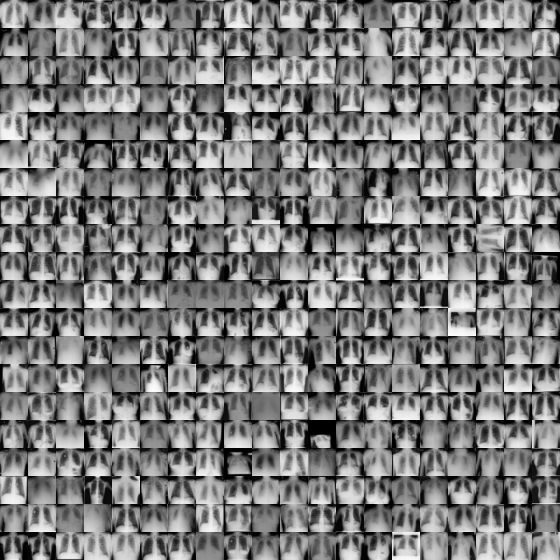

In [158]:
# montage

chest_train_dataset.montage(length=20)

In [159]:
x, y = chest_train_dataset[0]

print(np.array(x).shape, y.shape)

(28, 28) (14,)


In [160]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

Size 78468
(78468, 28, 28) (78468, 14)


In [161]:
x

array([[[ 68,  79,  76, ...,  82,  85, 116],
        [ 72,  78,  80, ...,  92,  93, 117],
        [ 86,  83,  81, ...,  94,  97, 115],
        ...,
        [107, 147, 172, ..., 194, 182, 129],
        [ 96, 152, 179, ..., 197, 187, 140],
        [102, 165, 188, ..., 206, 200, 178]],

       [[ 11,  11,  11, ...,  28,  18,  13],
        [ 10,  10,  15, ...,  78,  53,  26],
        [ 11,  24,  48, ...,  97,  82,  54],
        ...,
        [ 79,  90, 118, ..., 152, 128,  75],
        [ 77, 108, 129, ..., 157, 138, 104],
        [ 80, 117, 135, ..., 162, 148, 121]],

       [[  1,   1,   1, ...,   1,   2,  43],
        [  1,   1,   1, ...,   5,   2,  24],
        [  1,   1,   1, ...,  20,   6,   8],
        ...,
        [ 18,  18,  46, ..., 172, 159, 127],
        [  8,  10,  40, ..., 179, 167, 143],
        [  4,   6,  34, ..., 184, 175, 155]],

       ...,

       [[ 24,  19,  20, ...,  57,  61,  70],
        [  9,   9,   9, ...,   7,   7,   7],
        [  9,   9,  10, ...,   9,   9,   9

In [162]:
import pandas as pd

In [163]:
# Reshape the array to 2D (flatten each image)
# Reshape the array to 2D (flatten each image)
n_samples = x.shape[0]
n_features = np.prod(x.shape[1:])  # Total number of pixels in each image (28*28)
x_reshaped = x.reshape(n_samples, n_features)

# Convert the reshaped array to a Pandas DataFrame
x_df = pd.DataFrame(x_reshaped)


In [164]:
x_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,68,79,76,75,86,79,73,84,82,72,...,223,220,217,219,219,217,211,206,200,178
1,11,11,11,11,11,16,26,45,78,70,...,201,199,195,192,185,178,172,162,148,121
2,1,1,1,1,3,30,73,94,116,126,...,208,205,200,198,197,193,189,184,175,155
3,19,51,86,86,75,73,66,64,61,72,...,178,169,159,150,139,126,90,18,5,39
4,14,0,0,0,0,0,0,0,0,5,...,221,210,196,184,169,133,86,30,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78463,19,19,23,29,38,50,62,75,95,120,...,223,222,219,215,209,201,193,181,160,111
78464,29,2,4,14,36,51,62,69,72,76,...,146,145,142,139,136,128,111,85,41,2
78465,24,19,20,21,22,24,24,30,79,117,...,133,103,49,21,16,10,10,10,10,10
78466,17,17,17,18,18,17,17,16,24,86,...,203,201,195,181,179,180,154,97,36,75


In [165]:
y_df = pd.DataFrame(y)

In [166]:
y_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78463,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78464,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78465,0,0,0,1,0,0,0,1,0,0,0,0,0,0
78466,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [167]:
y_df.value_counts()

0  1  2  3  4  5  6  7  8  9  10  11  12  13
0  0  0  0  0  0  0  0  0  0  0   0   0   0     42405
         1  0  0  0  0  0  0  0   0   0   0      6663
1  0  0  0  0  0  0  0  0  0  0   0   0   0      2942
0  0  1  0  0  0  0  0  0  0  0   0   0   0      2730
      0  0  0  1  0  0  0  0  0   0   0   0      1883
                                                ...  
   1  0  1  0  0  1  0  0  1  0   0   0   0         1
                  0  0  1  1  0   0   0   0         1
                        0  0  0   0   0   1         1
         0  1  1  0  0  0  0  0   0   0   0         1
1  1  1  1  1  1  0  0  1  1  0   0   0   0         1
Name: count, Length: 682, dtype: int64

In [173]:
joined_xy_df = pd.concat([x_df, y_df], axis=1)

In [175]:
xy_df_singlecondition = joined_xy_df[(joined_xy_df.iloc[:, -14:].sum(axis=1) >= 0) & (joined_xy_df.iloc[:, -14:].sum(axis=1) <= 1)]

In [176]:
xy_df_singlecondition.shape

(64007, 798)

In [177]:
y_singlecondition_train = xy_df_singlecondition.iloc[:, -14:]
x_singlecondition_train = xy_df_singlecondition.iloc[:, :784]

In [178]:
y_singlecondition_train.value_counts()

0  1  2  3  4  5  6  7  8  9  10  11  12  13
0  0  0  0  0  0  0  0  0  0  0   0   0   0     42405
         1  0  0  0  0  0  0  0   0   0   0      6663
1  0  0  0  0  0  0  0  0  0  0   0   0   0      2942
0  0  1  0  0  0  0  0  0  0  0   0   0   0      2730
      0  0  0  1  0  0  0  0  0   0   0   0      1883
               0  0  1  0  0  0   0   0   0      1552
            1  0  0  0  0  0  0   0   0   0      1481
            0  0  0  0  1  0  0   0   0   0       952
                        0  0  0   0   1   0       759
   1  0  0  0  0  0  0  0  0  0   0   0   0       754
   0  0  0  0  0  0  0  0  0  1   0   0   0       635
                              0   1   0   0       491
                           1  0   0   0   0       479
                  1  0  0  0  0   0   0   0       210
                  0  0  0  0  0   0   0   1        71
Name: count, dtype: int64

In [179]:
y_revised_train = y_singlecondition_train.idxmax(axis=1)

In [180]:
y_revised_train.shape

(64007,)

In [181]:
y_revised_train.value_counts()

0     45347
3      6663
2      2730
5      1883
7      1552
4      1481
8       952
12      759
1       754
10      635
11      491
9       479
6       210
13       71
Name: count, dtype: int64

In [182]:
y_revised_train

0        4
1        0
2        3
3        3
5        0
        ..
78462    5
78463    0
78464    0
78466    3
78467    0
Length: 64007, dtype: int64

In [183]:
y_df_singlecondition

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78462,0,0,0,0,0,1,0,0,0,0,0,0,0,0
78463,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78464,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78466,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [172]:
y_df_singlecondition.value_counts()

0  1  2  3  4  5  6  7  8  9  10  11  12  13
0  0  0  0  0  0  0  0  0  0  0   0   0   0     42405
         1  0  0  0  0  0  0  0   0   0   0      6663
1  0  0  0  0  0  0  0  0  0  0   0   0   0      2942
0  0  1  0  0  0  0  0  0  0  0   0   0   0      2730
      0  0  0  1  0  0  0  0  0   0   0   0      1883
               0  0  1  0  0  0   0   0   0      1552
            1  0  0  0  0  0  0   0   0   0      1481
            0  0  0  0  1  0  0   0   0   0       952
                        0  0  0   0   1   0       759
   1  0  0  0  0  0  0  0  0  0   0   0   0       754
   0  0  0  0  0  0  0  0  0  1   0   0   0       635
                              0   1   0   0       491
                           1  0   0   0   0       479
                  1  0  0  0  0   0   0   0       210
                  0  0  0  0  0   0   0   1        71
Name: count, dtype: int64

In [170]:
y_df_singlecondition = y_df[(y_df.sum(axis=1) >= 0) & (y_df.sum(axis=1) <= 1)]

In [171]:
y_df_singlecondition.shape

(64007, 14)

In [168]:
y_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [184]:
x_chest_training = x_singlecondition_train
y_chest_training = y_revised_train

In [186]:
x_chest_training.shape

(64007, 784)

In [185]:
x_chest_training.to_csv('x_chest_training.csv', index=False)
y_chest_training.to_csv('y_chest_training.csv', index=False)


# We then check a 2D dataset with size 128x128

In [12]:
data_flag = 'pathmnist'
download = True


info = INFO[data_flag]
DataClass = getattr(dataset_without_pytorch, info['python_class'])

# load the data
train_dataset = DataClass(split='train', download=download, size=128, mmap_mode='r')

# encapsulate data into dataloader form
train_loader = get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)

 11%|█         | 469860352/4257786775 [00:52<07:00, 9000523.70it/s] 


RuntimeError: Something went wrong when downloading! Go to the homepage to download manually. https://github.com/MedMNIST/MedMNIST/

In [12]:
x, y = train_dataset[0]

print(np.array(x).shape, y.shape)

(128, 128, 3) (1,)


In [13]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

Size 89996
(128, 128, 128, 3) (128, 1)


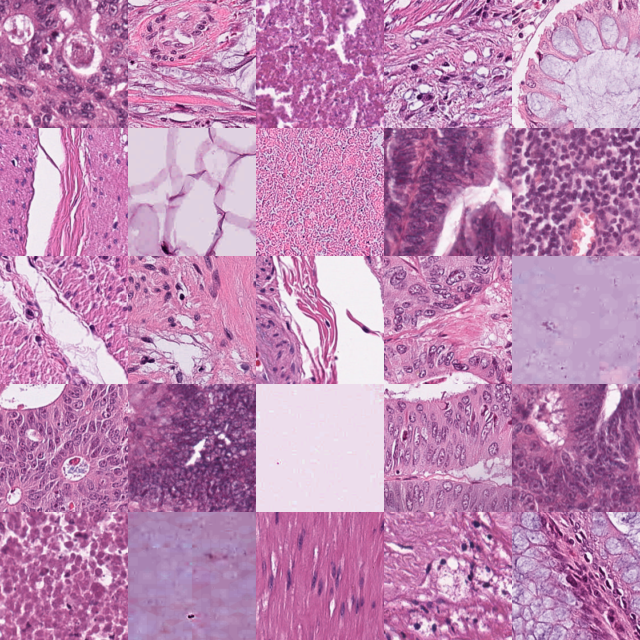

In [14]:
train_dataset.montage(length=5)

# We then check a 3D dataset with size 28x28x28

In [15]:
data_flag = 'organmnist3d'
download = True

info = INFO[data_flag]
DataClass = getattr(dataset_without_pytorch, info['python_class'])

# load the data
train_dataset = DataClass(split='train',  download=download)

# encapsulate data into dataloader form
train_loader = get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)

Using downloaded and verified file: /home/sr/.medmnist/organmnist3d.npz


In [16]:
x, y = train_dataset[0]

print(x.shape, y.shape)

(1, 28, 28, 28) (1,)


In [17]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

Size 971
(128, 1, 28, 28, 28) (128, 1)


In [18]:
frames = train_dataset.montage(length=1, save_folder="tmp/")
frames[10]

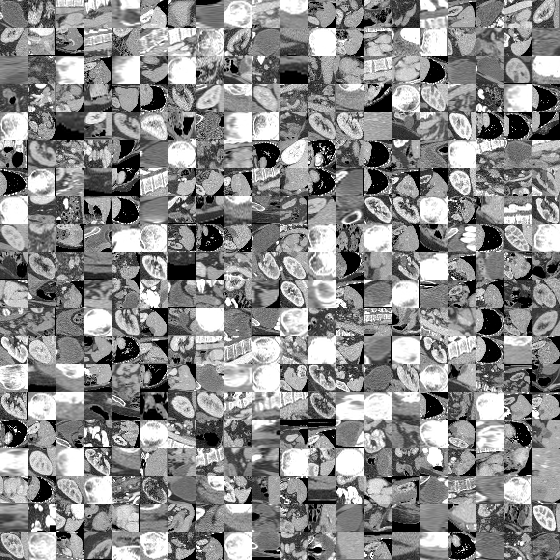

In [19]:
frames = train_dataset.montage(length=20, save_folder="tmp_without_pytorch/")

frames[10]

## Go and check the generated [gif](tmp_without_pytorch/organmnist3d_train_montage.gif) ;)

# We then check a 3D dataset with size 64x64x64

In [20]:
data_flag = 'organmnist3d'
download = True

info = INFO[data_flag]
DataClass = getattr(dataset_without_pytorch, info['python_class'])

# load the data
train_dataset = DataClass(split='train',  download=download, size=64)

# encapsulate data into dataloader form
train_loader = get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)


Using downloaded and verified file: /home/sr/.medmnist/organmnist3d_64.npz


In [21]:
x, y = train_dataset[0]

print(x.shape, y.shape)

(1, 64, 64, 64) (1,)


In [22]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

Size 971
(128, 1, 64, 64, 64) (128, 1)


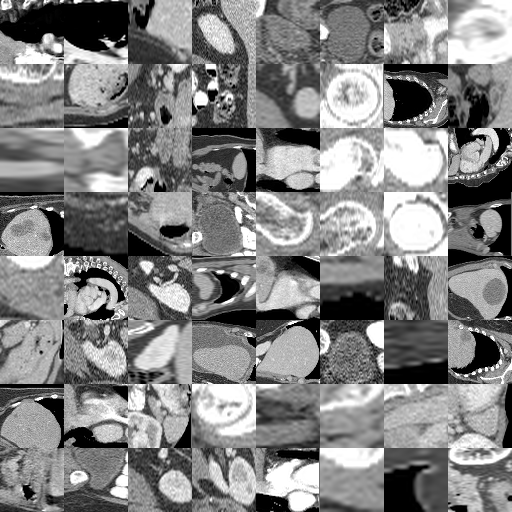

In [23]:
frames = train_dataset.montage(length=8, save_folder="tmp_without_pytorch/")

frames[10]

## Go and check the generated [gif](tmp_without_pytorch/organmnist3d_64_train_montage.gif) ;)

# Check [EXTERNAL] [`MedMNIST/experiments`](https://github.com/MedMNIST/experiments)

Training and evaluation scripts to reproduce both 2D and 3D experiments in our paper, including PyTorch, auto-sklearn, AutoKeras and Google AutoML Vision together with their weights ;)